# Исследование надежности заёмщиков


**Цель исследования**  

Нужно разобраться, как разные характеристика клиента влияют на факт погашения кредита в срок.    
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Заказчик**    

Кредитный отдел банка.

**Вопросы, на которые необходимо ответить:**    

* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**    

Входные данные от банка — статистика о платёжеспособности клиентов, файл `data.csv`.    
О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки.

Таким образом, исследование пройдёт в три этапа:

* Обзор данных.
* Предобработка данных.
* Ответы на вопросы.


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,count,sum,ratio
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


<AxesSubplot:xlabel='children', ylabel='ratio'>

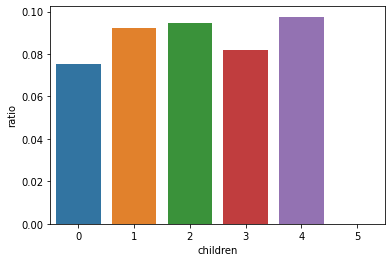

In [22]:
import seaborn
data_pivot_children = data.pivot_table(index=['children'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot_children['ratio'] = data_pivot_children['sum']/data_pivot_children['count']

data_pivot_children = data_pivot_children.sort_values(by='ratio', ascending=False)

display(data_pivot_children)
seaborn.barplot(x=data_pivot_children.index, y=data_pivot_children['ratio']) # Ваш код будет здесь. Вы можете создавать новые ячейки.

In [23]:
print(data_pivot_children['count'].sum() - (data['children'] == 0).sum())
print(data_pivot_children['sum'].sum() - 1063)
print((data_pivot_children['sum'].sum() - 1063) / (data_pivot_children['count'].sum() - (data['children'] == 0).sum()))
print(0.0924-0.0754)

7240
669
0.09240331491712707
0.017


**Вывод:** наличие детей в семье влияет на возврат кредита в срок. 
Из 14091 семей без детей задолженности имеется у 1063 клиентов, это 7.54%.
Из 7240 семей имеющих детей, задолженность имеют 669 клиентов. Это 9.25%.
То есть, в целом, наличие детей в семье повышает риск невыплаты кредита в срок на 1.7 % в среднем.
Количество детей в семье, по разному зависит от возврата кредита в срок. Например у семей с 3 детьми, процент задолженности по кредиту меньше чем у семей с 1 ребенком, у семей с 4 детьми самый высокий процент невыплаты кредита в срок. У семей с 5 детьми вообще нет задолженностей по кредит, может быть потому что такиих семей немного и они лишь являются исключением.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,count,sum,ratio
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


<AxesSubplot:xlabel='ratio', ylabel='family_status'>

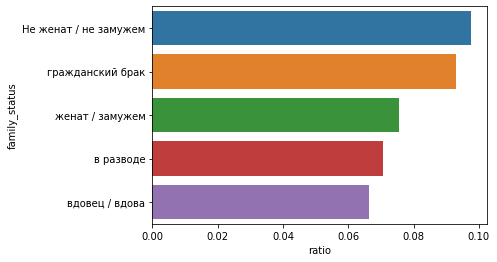

In [24]:
import seaborn
data_pivot_family_status = data.pivot_table(index=['family_status'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot_family_status['ratio'] = data_pivot_family_status['sum']/data_pivot_family_status['count']

data_pivot_family_status = data_pivot_family_status.sort_values(by='ratio', ascending=False)

display(data_pivot_family_status)
seaborn.barplot(y=data_pivot_family_status.index, x=data_pivot_family_status['ratio']) # Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** возврат кредита  в срок зависит от семейного положения. Среди холостых людей 9.7% имеют задолженности, те кто находится в гражданском браке 9.3%, а среди пар задолженность имеют только 7.5%, у тех кто в раводе 7% имеют задолженность, самый низкий процент задолженности 6.6% имеют вдовцы и вдовы. Из этого всего можно сделать вывод больше всего задолженностей имеют холостые люди, наличие семейного положения, делает людей более ответственными с выплатой кредита в срок. После развода или будучи в статусе вдвовец/вдова люди сохраняют тенденцию возврата кредита в срок и имеют самый малый процент задолженностей.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,count,sum,ratio
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


<AxesSubplot:xlabel='ratio', ylabel='total_income_category'>

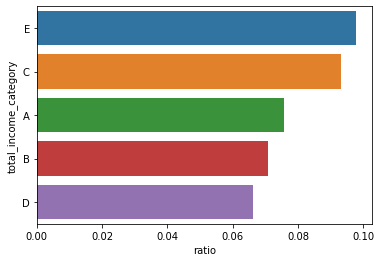

In [25]:
import seaborn
data_pivot_income_category = data.pivot_table(index=['total_income_category'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot_income_category['ratio'] = data_pivot_income_category['sum']/data_pivot_income_category['count']

data_pivot_income_category = data_pivot_income_category.sort_values(by='ratio', ascending=False)

display(data_pivot_income_category)
seaborn.barplot(y=data_pivot_income_category.index, x=data_pivot_family_status['ratio']) # Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** Ранее мы обозначили категории кредитополучателей, в зависимости от уровня дохода. С доходом от 0 до 30000 руб категория - Е, с доходом от 30001 до 50000 руб категория - D, с доходом от 50001 до 200000 руб категория - C, с доходом от 200001 до 1000000 руб категория - B, 1000001 руб и выше — категория A.
В результате стало известно что заемщики с доходом от 30001 до 50000 руб лучше всего выплачивают кредит вовремя, заемщики с доходом от 0 до 30000 руб хуже всех выплачивают кредит в срок. Люди с выоскими доходами от 200001 руб чаще допускают задолженность по выплате кредитов в срок.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,count,sum,ratio
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


<AxesSubplot:xlabel='ratio', ylabel='total_income_category'>

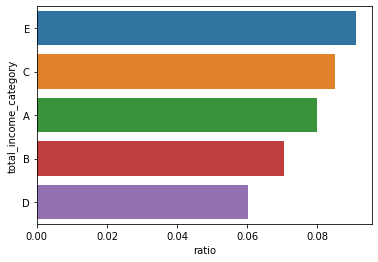

In [26]:
import seaborn
data_pivot_purpose_category = data.pivot_table(index=['purpose_category'], values = 'debt', aggfunc = {'count', 'sum'})
data_pivot_purpose_category['ratio'] = data_pivot_purpose_category['sum']/data_pivot_purpose_category['count']

data_pivot_purpose_category = data_pivot_income_category.sort_values(by='ratio', ascending=False)

display(data_pivot_purpose_category)
seaborn.barplot(y=data_pivot_purpose_category.index, x=data_pivot_purpose_category['ratio']) # Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** В результате исследования можно сказать что люди берущие кредит на операции с недвижимостью, чаще других отдают его в срок и имеют всего 7.2% задолженностей. Кредиты на операции с автомобилями или на получение образования реже отдаются в срок и имеют примерно 9.3% задолженностей.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* в нашем случае были замечены пропуски в количественных переменных. Такие пропуски могут возникнуть в результате ошибки ввода данных или нежелания клиента вводить эти данные, т.е сокрытие данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* потому что если заполнять подобные пропуски средним значением то, оно может некорректно отобразить итоговые данные, если вдруг некоторые значения сильно выделяются среди большинства. Из за одного высокого значения может сильно измениться общая средняя статистика. Поэтотму пропуски в количественных переменных лучше заполнять медианным значением.

### Шаг 4: общий вывод.

В ходе данной проектной работы я изучил предоставленные данные по заемщикам банка, подготовил данные к анализу: нашел пропуски в данных и исправил их, провел обработку аномальных значений, выполнил обработку дубликатов и провел категоризацию данных. Т.е сделал все необходимое, чтобы с данными можно было работать и исследовать их.

В ходе исследований было выявлено, что наличие детей у клиента и их количество, влияет на факт погашения кредита в срок, клиенты с детьми реже погашают кредит в срок, чем клиенты, не имеющие детей.

На срок возврата кредита в срок влияет и семейное положение клиента. Клиенты имеющие холостое семейное положение реже погашают кредит в срок, чем клиенты,  состоящие в браке. Клиенты после развода или будучи в статусе вдвовец/вдова сохраняют тенденцию возврата кредита в срок и имеют самый малый процент наличия задолженностей.

Также на факт погашения кредита в срок влияет уровень дохода клиента и цели взятия кредита. Заемщики с доходом от 30 до 50 тыс. руб. лучше всего выплачивают кредит вовремя, а заемщики с доходом от 0 до 30000 руб хуже всего. Если кредит берут на операции с недвижимостью, то чаще отдают его в срок и не имеют задолженности, чем например клиенты которые берут кредит на операции с автомобилем или на получение образования.